In [3]:
import csv

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [4]:
dataset = 'hand_landmarks.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
model_save_path = 'hand_classifier.hdf5'
tflite_save_path = 'hand_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 26

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1356 (5.30 KB)
Trainable params: 1356 (5.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


29/29 [==============================] - ETA: 0s - loss: 3.2525 - accuracy: 0.0456 
Epoch 1: saving model to hand_classifier.hdf5
29/29 [==============================] - 1s 9ms/step - loss: 3.2525 - accuracy: 0.0456 - val_loss: 3.1507 - val_accuracy: 0.0858
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 3.1759 - accuracy: 0.0859
Epoch 2: saving model to hand_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 3.1543 - accuracy: 0.0764 - val_loss: 3.0521 - val_accuracy: 0.1575
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 3.1749 - accuracy: 0.0547

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to hand_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 3.0675 - accuracy: 0.1103 - val_loss: 2.9366 - val_accuracy: 0.1792
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 3.0132 - accuracy: 0.1172
Epoch 4: saving model to hand_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2.9567 - accuracy: 0.1336 - val_loss: 2.7841 - val_accuracy: 0.2367
Epoch 5/1000
 1/29 [>.............................] - ETA: 0s - loss: 2.9563 - accuracy: 0.1172
Epoch 5: saving model to hand_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 2.8415 - accuracy: 0.1461 - val_loss: 2.6257 - val_accuracy: 0.2358
Epoch 6/1000
26/29 [=========================>....] - ETA: 0s - loss: 2.7243 - accuracy: 0.1532
Epoch 6: saving model to hand_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2.7218 - accuracy: 0.1533 - val_loss: 2.4693 - val_accuracy: 0.2083
Epoch 7/100

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9867


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 80ms/step
[6.8880129e-37 1.0062184e-13 9.5265293e-01 1.5711900e-03 3.6580940e-24
 3.1916209e-31 1.9479701e-02 1.2551667e-03 2.3972850e-02 0.0000000e+00
 3.6290554e-11 1.3604298e-07 6.0145476e-15 2.6126084e-23 1.0359421e-03
 4.8032162e-11 1.2822161e-11 0.0000000e+00 1.4296501e-36 1.3465327e-10
 0.0000000e+00 1.4208949e-31 0.0000000e+00 3.2160850e-05 1.6979986e-20
 0.0000000e+00]
2


# Confusion matrix

38/38 [==============================] - 0s 811us/step


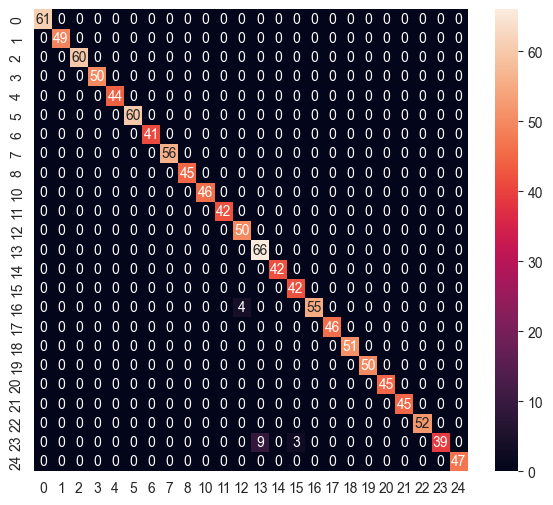

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        56
           8       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        42
          12       0.93      1.00      0.96        50
          13       0.88      1.00      0.94        66
          14       1.00      1.00      1.00        42
          15       0.93      1.00      0.97        42
          16       1.00      0.93      0.96        59
          17       1.00      1.00      1.00        46
     

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [137]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [138]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp_ggmhntt\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp_ggmhntt\assets


7576

# Inference test

In [139]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [140]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [141]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [1]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

NameError: name 'interpreter' is not defined

In [2]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

NameError: name 'np' is not defined

In [144]:
# Save the model
model.save(model_save_path, include_optimizer=False)

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Write the TFLite file
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpeg8t4hf_\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpeg8t4hf_\assets
